# Advanced functions and lists #6

### Default parameters

In [2]:
# 1e-8 means 10**-8
def are_epsilon_close(a, b, eps=1e-8):
    return abs(a-b) <= eps

assert are_epsilon_close((2**0.5)**2, 2) # using the default eps
assert are_epsilon_close((2**0.5)**2, 2, eps=1e-12) # overriding eps
# assert are_epsilon_close((2**0.5)**2, 2, eps = 0) # fails!

**default parameters**
this allows us to define a "standard" value for an argument that the function will use unless we specifically provide a different one.


the function **are_eopsilon_close** is designed to check if two numbers, a and b are "close enough" to be considered equal. this is a common technique when dealing with floating-point math, where tiny precision errors can occur.

* a, b : these are required positional arguments
* eps=1e-8: thhe default parameter. python asuume eps is 10^-8
* abs(a-b) <= eps: this logic checks if the absolute difference between the two numbers is less than or equal to our threshold.

### Comparing sequences (strings, tuples)

In [3]:
"Paul" < "Pole"

True

In [4]:
(1,2,3) < (1,2,4)

True

In [5]:
(1,2,3) <= (1,2,3)

True

In [6]:
(1,2,3) <= (1,2,4)

True

in python, comparing sequences like **strings** and **tuples** follows a specific logic called **lexicographical ordering**. this essentially "dictionary order." 

- how sequence comparison works?
1. it compares the first elements
2. if they are different, the difference determines the result of the comparision
3. if they are the same, it moves to the second elements, and so on.

### Functions taking functions as arguments (intermediate)
it's often useful to pass one function to another.
for example min/mas function accept an optional parameter 'key', which is a function which should extract the value to compare the elements by.

#### the power of the **key** parameter

when you pass a function to **key**, python does not compare the items themselves anymore. instead:
1. it runs the **key** functio on each item first
2. it compares the result (return values) of those functions to decide which item is "smaller" or "larger."



In [7]:
def by_second(x):
    return x[1] # returns the element at index 1

def by_sum(x):
    return x[0] + x[1] # returns the sum of the two elements

def default_key(x):
    return x

# tuples are compared lexicographically by default (like words)!
print("default (lexicographic):", min((1,2), (1,-1))) # comparison

min_value_by_second = min((1,2), (5, -1), key=by_second)
min_value_by_sum = min((1,2), (5, -1), key=by_sum)

print("by second", min_value_by_second)
print("by sum", min_value_by_sum)

default (lexicographic): (1, -1)
by second (5, -1)
by sum (1, 2)


In [8]:
my_comparison = by_sum # we can simply assign a function to a variable!

if 1 == 2:
    operation = min
else:
    operation = max

best_value = operation((5,-1), (1,3), key=my_comparison)

print(best_value)

(5, -1)


even though both tuples resulted in "sum" of 4, python follows a stable approach: when multiple items are equally "the best," it sticks with the one it encountered first.

### Task 1
Implement a function 'diff' which accepts another function  𝑓:ℝ→ℝ , two real/float numbers  𝑥0,ℎ  and returns an approximation of the derivative of  𝑓  evaluated at  𝑥0 . Test it.

Remember that the standard definition of derivative of  𝑓  evaluated at  𝑥0  is  𝑓′(𝑥0)=limℎ→0𝑓(𝑥0+ℎ)−𝑓(𝑥0)ℎ .

Instead of thinking about limits, we'll cheat and use some (usually small) value of  ℎ .

Bonus: Assuming  𝑓:ℝ2→ℝ , write a function grad which returns the gradient of  𝑓  evalauted at  𝑥0  (again with small  ℎ ).

#### The goal : approximating derivatives

in calculus, the derivative of a function f at a point x_0 is defined using a limit, in python, however, we can't truly take a "limit" to infinitely or zero, so we "cheat" by using a very small number for h.

In [33]:
%%file diff.py
# just a useful function
def are_epsilon_close(a, b, eps=1e-8):
    return abs(a-b) <= eps


def diff(f, x0, h=1e-8):
    return (f(x0+h) - f(x0)) / h  # straight forward but..

    '''
    Approximates the derivative of f at value x0 with some
  (presumabely) small value of h.

  (We can't really take a limit here, but for small enough h
  we should get a good approximation.)
    '''


# x_0: the point where we want to find the slope

def quadratic_func(x):
    return x**2

def test_diff_on_squre_at_1():
    d = diff(quadratic_func, 1, 1e-8)
    assert are_epsilon_close(2, d, eps=1e-5)

# assert > checking if the calculated derivative d is whithin 10^-5 of the expected value, which is 2.


Overwriting diff.py


In [34]:
!cat diff.py

# just a useful function
def are_epsilon_close(a, b, eps=1e-8):
    return abs(a-b) <= eps


def diff(f, x0, h=1e-8):
    return (f(x0+h) - f(x0)) / h  # straight forward but..

    '''
    Approximates the derivative of f at value x0 with some
  (presumabely) small value of h.

  (We can't really take a limit here, but for small enough h
  we should get a good approximation.)
    '''


# x_0: the point where we want to find the slope

def quadratic_func(x):
    return x**2

def test_diff_on_squre_at_1():
    d = diff(quadratic_func, 1, 1e-8)
    assert are_epsilon_close(2, d, eps=1e-5)

# assert > checking if the calculated derivative d is whithin 10^-5 of the expected value, which is 2.


In [35]:
!python -m pytest diff.py

============================= test session starts ==============================
platform darwin -- Python 3.11.8, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/laurensong/Desktop/school/MAS4115
plugins: anyio-4.2.0
collected 1 item                                                               

diff.py .                                                                [100%]

============================== 1 passed in 0.00s ===============================


In [60]:
%%file grad.py
def are_epsilon_close(a, b, eps=1e-8):
    return abs(a - b) <= eps

def grad(f, x0, y0, h=1e-8):
    dfdx = (f(x0 + h, y0) - f(x0, y0)) / h
    dfdy = (f(x0, y0 + h) - f(x0, y0)) / h
    return (dfdx, dfdy)

def circle(x, y):
    return x**2 + y**2

def test_grad_circle():
    g = grad(circle, 1, 2, h=1e-6)
    assert are_epsilon_close(g[0], 2, eps=1e-5)
    assert are_epsilon_close(g[1], 4, eps=1e-5)


Overwriting grad.py


In [61]:
!cat grad.py

def are_epsilon_close(a, b, eps=1e-8):
    return abs(a - b) <= eps

def grad(f, x0, y0, h=1e-8):
    dfdx = (f(x0 + h, y0) - f(x0, y0)) / h
    dfdy = (f(x0, y0 + h) - f(x0, y0)) / h
    return (dfdx, dfdy)

def circle(x, y):
    return x**2 + y**2

def test_grad_circle():
    g = grad(circle, 1, 2, h=1e-6)
    assert are_epsilon_close(g[0], 2, eps=1e-5)
    assert are_epsilon_close(g[1], 4, eps=1e-5)


In [62]:
!python -m pytest grad.py

============================= test session starts ==============================
platform darwin -- Python 3.11.8, pytest-7.4.0, pluggy-1.0.0
rootdir: /Users/laurensong/Desktop/school/MAS4115
plugins: anyio-4.2.0
collected 1 item                                                               

grad.py .                                                                [100%]

============================== 1 passed in 0.00s ===============================


In [18]:
import matplotlib.pyplot as plt

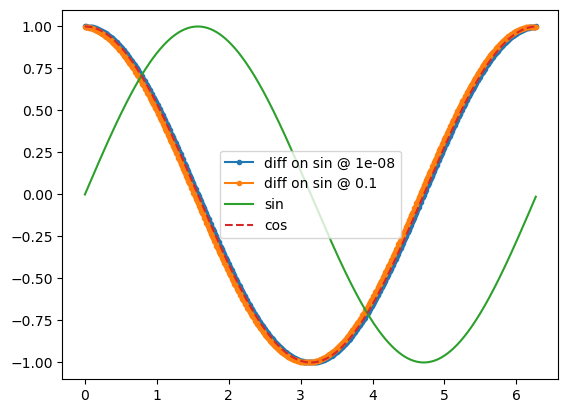

In [ ]:

# this uses some things we haven't covered yet! just run it!

from math import sin, cos
xs = [x/100 for x in range(628)]
ss = [sin(x) for x in xs]
cs = [cos(x) for x in xs]

for h in (1e-8, 0.1): # can also try other values of h
    ys = [diff(sin, x, h) for x in xs]
    plt.plot(xs, ys, '.-', label=f'diff on sin @ {h}')

plt.plot(xs, ss, label = 'sin')
plt.plot(xs, cs, '--', label='cos')
plt.legend()


### Lists

In [63]:
my_list = [2, 3, 5, 8]

In [64]:
print(type(my_list))

<class 'list'>


### Idiomatic checking for non-emptiness and the length of the list

In [65]:
if my_list : 
    print("this list is nonempty")
else:
    print('oops, this list is empty')

this list is nonempty


In [66]:
print("length: ", len(my_list))

length:  4


### Generating large lists (of equal elements)

while we'll see better ways of constructing lists, it's sometimes useful to generate an 'empty' list of a given size and populate it with values in a loop.

In [69]:
my_long_list = [7]*7
print(my_long_list)

[7, 7, 7, 7, 7, 7, 7]


### Accessing elements

In [70]:
# we can index the list, starting from 0 (as it should be)

print(my_list)
print(my_list[0])

[2, 3, 5, 8]
2


In [73]:
my_list = [2, 3, 5, 8]
print(my_list)

my_list[1] = 1
my_list[2] = 9
my_list[3] = 2003
print(my_list)

[2, 3, 5, 8]
[2, 1, 9, 2003]


In [74]:
my_list[-1]

2003

In [78]:
my_tuple = (2, 3, 5, 8)
my_tuple[0] = 5 # error ! tuples are immmutable

TypeError: 'tuple' object does not support item assignment

### Basic list slicing (super useful)

In [82]:
k = 2
print(my_list)

print(my_list[:k]) # [0:k)

print(my_list[-k:]) # [n-k:n)

print(my_list[k:]) # [k:n]
print(my_list[::-1]) # [n-1, n-2,...0]

[2, 1, 9, 2003]
[2, 1]
[9, 2003]
[9, 2003]
[2003, 9, 1, 2]


### Danger

In [83]:
A = [1,2,3]
B = A
A += [100]
B[0] = -1
print(A, B, A is B)

[-1, 2, 3, 100] [-1, 2, 3, 100] True


In [85]:
A = [1,2,3]
B = A
A = A + [100]
B[0] = -1
print(A, B, A is B)

[1, 2, 3, 100] [-1, 2, 3] False


In [84]:
A = [1,2,3]
B = A.copy() # !
A += [100]
B[0] = -1

print(A, B, A is B)

[1, 2, 3, 100] [-1, 2, 3] False


In [86]:
def change_list(my_list):
  my_list[0] += 10
  #my_list += [-1]
  my_list = my_list + [-1]
  print('list inside before:', my_list)
  my_list = [20,30,40]
  print('list inside after:', my_list)

L = [1,2,3]
print('list outside before:', L)
change_list(L)
print('list outside after:', L)

# understand - local variables

list outside before: [1, 2, 3]
list inside before: [11, 2, 3, -1]
list inside after: [20, 30, 40]
list outside after: [11, 2, 3]


In [88]:
# standard error!
def added_suffix(x, y=[]):
  res = x + y
  y += ["I changed y accidentally, it shouldn't matter"]
  return res


print(added_suffix([1,2,3]))
print(added_suffix([1,2,3], [4]))
print(added_suffix([1,2,3]))

[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3, "I changed y accidentally, it shouldn't matter"]


In [87]:
# standard workaround!
def added_suffix(x, y=None):
  if y == None: y = []
  res = x + y
  y += ["I changed y accidentally, it shouldn't matter"]
  return res


print(added_suffix([1,2,3]))
print(added_suffix([1,2,3], [4]))
print(added_suffix([1,2,3]))

[1, 2, 3]
[1, 2, 3, 4]
[1, 2, 3]
